<a href="https://colab.research.google.com/github/Gregory-Eales/RL-TicTacToe/blob/master/RL_TicTacToe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dependencies

In [39]:
!pip3 install dropbox

In [0]:
import numpy as np
import keras
import dropbox
import random
from tqdm import tqdm_notebook
from keras.layers import Convolution2D as Conv2D
from keras.layers import Dense
from keras.layers import Flatten
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

Defining Training Enviroment

In [0]:
class TrainENV(object):
  
  def __init__(self, num_models=2):
    self.num_models = 2
    self.board = np.zeros([3, 3])
    self.dbx_token = "qCE45upb8QAAAAAAAAAAEkIQWUdP5SqMqWG9I5C_3DDAN_Vlleeyjvc5Sv4vyWp9"
    self.dbx = dropbox.Dropbox(self.dbx_token)
    self.initialize_models()
    self.build_model_architecture()
    
  ###############################
  # DEEP NEURAL NETWORK METHODS #
  ###############################
  
  # defines and stores models in model dict
  def initialize_models(self):
    self.model = {}
    for i in range(self.num_models):
      self.model["M" + str(i+1)] = keras.models.Sequential()
    
    
  # builds initialized model with defined architecture
  def build_model_architecture(self):
    for i in range(self.num_models):
      self.model["M" + str(i+1)].add(Conv2D(30, kernel_size=2, activation='relu', padding="same", input_shape=(3,3,1)))
      self.model["M" + str(i+1)].add(Conv2D(15, kernel_size=2, padding="same", activation='relu'))
      self.model["M" + str(i+1)].add(Flatten())
      self.model["M" + str(i+1)].add(Dense(15, activation='relu'))
      self.model["M" + str(i+1)].add(Dense(9, activation='sigmoid'))
      self.model['M' + str(i+1)].compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    
  
  # saves models in project folder
  def save_models(self):
    for i in range(self.num_models):
     # self.model["M"+str(i+1)].
     pass
  
  # loads models from project folder
  def load_models(self):
    pass
  
  ###########################
  # GAME ENVIROMENT METHODS #
  ###########################
  
  # runs the main game loop
  def play_human(self):
    self.board = np.zeros([3, 3])
    turn = random.choice(["human", "ai"])
    playing = True
    self.print_board()
    while playing:
      
      if turn == "ai":
      # make ai move
        self.make_ai_move()
        turn = "human"
        
      else:
        # make rand move
        self.make_human_move()
        turn = "ai"
          
      winner_state = self.check_winner()
        
      if winner_state == None and self.check_draw():
        playing = False
        print("Game was a draw!")
        
      if winner_state != None:
        playing = False
        
      self.print_board()
    
    if winner_state == 1:
      print("AI won the match!")
      
    if winner_state == -1:
      print("Human won the match!")
  
  def rand_train_ai(self, model="M1", epochs=100):
    
    hist_win_rate = []
    number_games = 0
    ai_wins = 0
    
    for i in tqdm_notebook(range(epochs)):
      number_games += 1
      self.board = np.zeros([3, 3])
      playing = True
      turn = random.choice(["ai", "rand"])
      big_x = []
      big_y = []
      ai_x = []
      ai_y = []
      rand_x = []
      rand_y = []
      
      while playing:
        
        if turn == "ai":
          # make ai move
          ai_y.append(self.board)
          ai_x.append(self.make_ai_move())
          turn = "rand"
        
        elif turn == "rand":
          # make rand move
          rand_y.append(self.board/-1)
          rand_x.append(self.make_rand_move()/-1)
          turn = "ai"
          
        winner_state = self.check_winner()
        
        if winner_state == None and self.check_draw():
          playing = False
        
        if winner_state != None:
          playing = False
        
      if winner_state == 1:
        ai_wins += 1
        length = len(ai_x)
        big_x = big_x + rand_x
        big_y = big_y + rand_y
        ai_x = np.array(ai_x).reshape(length, 3, 3, 1)
        ai_y = np.array(ai_y).reshape(length, 9)
        self.model[model].fit(ai_x, ai_y, verbose=0, epochs=10)
          
      if winner_state == -1:
        length = len(rand_x)
        big_x = big_x + rand_x
        big_y = big_y + rand_y
        rand_x = np.array(rand_x).reshape(length, 3, 3, 1)
        rand_y = np.array(rand_y).reshape(length, 9)
        self.model[model].fit(rand_x, rand_y, verbose=0, epochs=10)
        
      hist_win_rate.append(ai_wins/number_games)
    plt.plot(hist_win_rate)
    plt.show()
    
    length = len(big_x)
    big_x = np.array(big_x).reshape(length, 3, 3, 1)
    big_y = np.array(big_y).reshape(length, 9)
    self.model[model].fit(big_x, big_y, epochs = 1000)
    
  
  def ai_train_ai(self, model1="M1", model2 = "M2", epochs=100):
    
    hist_win_rate = []
    number_games = 0
    ai_wins = 0
    
    for i in tqdm_notebook(range(epochs)):
      number_games += 1
      self.board = np.zeros([3, 3])
      playing = True
      turn = random.choice(["M2", "M1"])
      big_x = []
      big_y = []
      ai_x = []
      ai_y = []
      rand_x = []
      rand_y = []
      
      while playing:
        
        if turn == "M1":
          # make ai move
          ai_y.append(self.board)
          ai_x.append(self.make_ai_move(model="M1"))
          turn = "M2"
        
        elif turn == "M2":
          # make rand move
          rand_y.append(self.board/-1)
          rand_x.append(self.make_ai_move(model="M2", state_type = -1)/-1)
          turn = "M1"
          
        winner_state = self.check_winner()
        
        if winner_state == None and self.check_draw():
          playing = False
        
        if winner_state != None:
          playing = False
        
      if winner_state == 1:
        ai_wins += 1
        length = len(ai_x)
        big_x = big_x + rand_x
        big_y = big_y + rand_y
        ai_x = np.array(ai_x).reshape(length, 3, 3, 1)
        ai_y = np.array(ai_y).reshape(length, 9)
        self.model[model1].fit(ai_x, ai_y, verbose=0, epochs=5)
        self.model[model2].fit(ai_x, ai_y, verbose=0, epochs=5)
        
          
      if winner_state == -1:
        length = len(rand_x)
        big_x = big_x + rand_x
        big_y = big_y + rand_y
        rand_x = np.array(rand_x).reshape(length, 3, 3, 1)
        rand_y = np.array(rand_y).reshape(length, 9)
        self.model[model1].fit(rand_x, rand_y, verbose=0, epochs=5)
        self.model[model2].fit(rand_x, rand_y, verbose=0, epochs=5)
        
      hist_win_rate.append(ai_wins/number_games)
    plt.plot(hist_win_rate)
    plt.show()
    
    length = len(big_x)
    big_x = np.array(big_x).reshape(length, 3, 3, 1)
    big_y = np.array(big_y).reshape(length, 9)
    self.model[model1].fit(big_x, big_y, epochs = 1000)
        
  def make_ai_move(self, model="M1", state_type=1):
    if state_type == 1:
      move = self.model[model].predict(self.board.reshape(1, 3, 3, 1)).reshape(3, 3)
    if state_type == -1:
      move = self.model[model].predict(self.board.reshape(1, 3, 3, 1)/-1).reshape(3, 3)
    picking = True
    while picking:
      maximum = move.max()
      pred_truth = move == maximum
      pred_truth = pred_truth
      activation_loc = [0, 0]
      for j in range(3):
        for i in range(3):
          if pred_truth[j][i] == 1:
            activation_loc = [i, j]
            if self.board[j][i] == 0:
              self.board[j][i] = state_type
              picking = False
              return move
            else:
              move[activation_loc[1]][activation_loc[0]] = 0
    
  
  
  def make_rand_move(self):
    move = np.zeros([3, 3])
    moves = []
    for i in range(3):
      for j in range(3):
        if self.board[j][i] == 0:
          moves.append([j, i])
    
    if moves != []:
      
      choice = random.choice(moves)
    
      self.board[choice[0]][choice[1]] = -1
  
      move[choice[0]][choice[1]] = -1
    
      return move
    
    else:
      #print(self.board)
      pass
      
  # checks for a draw
  def check_draw(self):
    
    for i in range(3):
      for j in range(3):
        if self.board[i][j] == 0:
          return False
    return True
  
  
  # checks to see if move is valid
  def check_move(self):
    pass
  
  # gets human move
  def make_human_move(self):
    making_move = True
    while making_move:
      y = input("move y-dimension: ")
      x = input("move y-dimension: ")
      if self.board[int(y)][int(x)] == 0:
            making_move = False
      else:
            print("Invalid Move, Try Again")
      
    self.board[int(y)][int(x)] = -1
  
  # check to see if there is a winner
  def check_winner(self):
    
    # check horizontal
    for i in range(3):
      
      if self.board[i][0] == self.board[i][1] and self.board[i][1] == self.board[i][2]:
        if self.board[i][0] != 0:
          return self.board[i][0]
        
      if self.board[0][i] == self.board[1][i] and self.board[1][i] == self.board[2][i]:
        if self.board[0][i] != 0:
          return self.board[0][i]
      
    if self.board[0][0] == self.board[1][1] and self.board[1][1] == self.board[2][2]:
      if self.board[0][0] != 0: 
        return self.board[0][0]
    
    if self.board[0][2] == self.board[1][1] and self.board[1][1] == self.board[2][0]:
      if self.board[1][1] != 0:
        return self.board[1][1]
    
    
    return None
   
      
  
  # prints board state
  def print_board(self):
    board = []
    
    for i in range(3):
      row = []
      for j in range(3):
        
        if self.board[i][j] == 0:
          row.append(" ")
          
        elif self.board[i][j] == 1:
          row.append("X")
        
        elif self.board[i][j] == -1:
          row.append("O")
        
      board.append(row)
    
    print("-------------")
    print("|", board[0][0], "|", board[0][1], "|", board[0][2], "|")
    print("-------------")
    print("|", board[1][0], "|", board[1][1], "|", board[1][2], "|")
    print("-------------")
    print("|", board[2][0], "|", board[2][1], "|", board[2][2], "|")
    print("-------------")
    
  
  
  ####################
  # DROP BOX METHODS #
  ####################
  
  # returns the current dropbox account
  def get_dbx_account(self):
    return(self.dbx.users_get_current_account())
  
  # uploads project file
  def upload_file_dbx(self):
    dbx.files_upload("RL-TicTacToe", '/RL-TicTacToe/')
  
  # downloads project file
  def download_file_dbx(self):
    pass

Testing ENV Elements





  0%|          | 0/100 [00:00<?, ?it/s]



  1%|          | 1/100 [00:07<11:40,  7.08s/it]



  5%|▌         | 5/100 [00:07<07:51,  4.96s/it]



 10%|█         | 10/100 [00:07<05:13,  3.48s/it]



 14%|█▍        | 14/100 [00:07<03:30,  2.44s/it]



 17%|█▋        | 17/100 [00:07<02:22,  1.72s/it]



 22%|██▏       | 22/100 [00:07<01:34,  1.21s/it]



 26%|██▌       | 26/100 [00:07<01:03,  1.17it/s]



 30%|███       | 30/100 [00:07<00:42,  1.65it/s]



 34%|███▍      | 34/100 [00:07<00:28,  2.31it/s]



 38%|███▊      | 38/100 [00:08<00:19,  3.21it/s]



 42%|████▏     | 42/100 [00:08<00:13,  4.41it/s]



 46%|████▌     | 46/100 [00:08<00:09,  5.98it/s]



 50%|█████     | 50/100 [00:08<00:06,  8.01it/s]



 56%|█████▌    | 56/100 [00:08<00:04, 10.82it/s]



 61%|██████    | 61/100 [00:08<00:02, 13.77it/s]



 66%|██████▌   | 66/100 [00:08<00:02, 16.95it/s]



 71%|███████   | 71/100 [00:08<00:01, 19.93it/s]



 75%|███████▌  | 75/100 [00:09<00:01, 22.62it/s]



 79%|███████▉  | 79

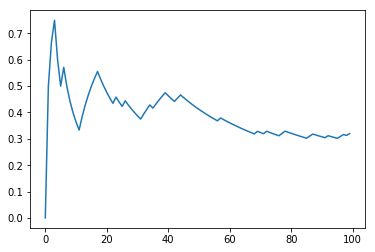

Epoch 1/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4489 - acc: 0.0000e+00
Epoch 2/1000
4/4 [==============================] - 0s 716us/step - loss: 0.4490 - acc: 0.0000e+00
Epoch 3/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4491 - acc: 0.0000e+00
Epoch 4/1000
4/4 [==============================] - 0s 695us/step - loss: 0.4491 - acc: 0.0000e+00
Epoch 5/1000
4/4 [==============================] - 0s 973us/step - loss: 0.4491 - acc: 0.0000e+00
Epoch 6/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4491 - acc: 0.0000e+00
Epoch 7/1000
4/4 [==============================] - 0s 594us/step - loss: 0.4490 - acc: 0.0000e+00
Epoch 8/1000
4/4 [==============================] - 0s 755us/step - loss: 0.4490 - acc: 0.0000e+00
Epoch 9/1000
4/4 [==============================] - 0s 974us/step - loss: 0.4489 - acc: 0.0000e+00
Epoch 10/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4488 - acc: 0.0000e+00
Epoch 11/1000
4/4

In [59]:
env = TrainENV()
env.ai_train_ai(epochs = 100)



  0%|          | 0/100 [00:00<?, ?it/s]

  6%|▌         | 6/100 [00:00<00:01, 58.06it/s]

 11%|█         | 11/100 [00:00<00:01, 54.58it/s]

 16%|█▌        | 16/100 [00:00<00:01, 51.69it/s]

 21%|██        | 21/100 [00:00<00:01, 49.17it/s]

 26%|██▌       | 26/100 [00:00<00:01, 47.78it/s]

 31%|███       | 31/100 [00:00<00:01, 46.52it/s]

 36%|███▌      | 36/100 [00:00<00:01, 46.36it/s]

 41%|████      | 41/100 [00:00<00:01, 45.90it/s]

 47%|████▋     | 47/100 [00:00<00:01, 47.95it/s]

 52%|█████▏    | 52/100 [00:01<00:01, 46.69it/s]

 57%|█████▋    | 57/100 [00:01<00:00, 45.86it/s]

 64%|██████▍   | 64/100 [00:01<00:00, 49.29it/s]

 69%|██████▉   | 69/100 [00:01<00:00, 48.13it/s]

 74%|███████▍  | 74/100 [00:01<00:00, 48.00it/s]

 79%|███████▉  | 79/100 [00:01<00:00, 47.16it/s]

 84%|████████▍ | 84/100 [00:01<00:00, 46.93it/s]

 89%|████████▉ | 89/100 [00:01<00:00, 46.32it/s]

 95%|█████████▌| 95/100 [00:01<00:00, 47.78it/s]

100%|██████████| 100/100 [00:02<00:00, 47.76it/s]



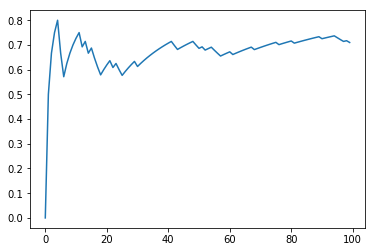

NameError: ignored

In [48]:
env.rand_train_ai(epochs = 100)

In [45]:
env.play_human()

-------------
|   |   |   |
-------------
|   |   |   |
-------------
|   |   |   |
-------------
move y-dimension: 1
move y-dimension: 1
-------------
|   |   |   |
-------------
|   | O |   |
-------------
|   |   |   |
-------------
-------------
| X |   |   |
-------------
|   | O |   |
-------------
|   |   |   |
-------------
move y-dimension: 1
move y-dimension: 2
-------------
| X |   |   |
-------------
|   | O | O |
-------------
|   |   |   |
-------------
-------------
| X |   |   |
-------------
|   | O | O |
-------------
|   |   | X |
-------------
move y-dimension: 0
move y-dimension: 1
-------------
| X | O |   |
-------------
|   | O | O |
-------------
|   |   | X |
-------------
-------------
| X | O | X |
-------------
|   | O | O |
-------------
|   |   | X |
-------------
move y-dimension: 2
move y-dimension: 1
-------------
| X | O | X |
-------------
|   | O | O |
-------------
|   | O | X |
-------------
Human won the match!
